# COGS 108 FINAL PROJECT

This notebook will explore the salary of SF workers in the government sector, and help us understand how these salaries have grown relative to each other, as well as relative to COA, inflation, and general economic growth.

This dataset will come from the years of 2011 - 2014, and will reflect the years post economic downturn from the 2008 recession.

In [1]:
import pandas as pd
import seaborn
import matplotlib as mpl
import numpy as np
import re
import matplotlib.pyplot as plt

We'll need to import the data collected from these Government-related jobs from 2011 - 2014 from the Dataset from Kaggle.

In [2]:
salary_df = pd.read_csv("Salaries.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})

C:\Users\cheng\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Load additional years of data
salary_2015 = pd.read_csv("san-francisco-2015.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2015 = salary_2015.drop(columns=['EmployeeName'])
salary_2015['JobTitle'] = salary_2015['JobTitle'].str.upper()

salary_2016 = pd.read_csv("san-francisco-2016.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2016 = salary_2016.drop(columns=['EmployeeName'])
salary_2016['JobTitle'] = salary_2016['JobTitle'].str.upper()

salary_2017 = pd.read_csv("san-francisco-2017.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2017 = salary_2017.drop(columns=['EmployeeName'])
salary_2017['JobTitle'] = salary_2017['JobTitle'].str.upper()

We'll also want to clean up this data in regards to safe harbor; this will require us to remove the name of the employee, as well as the agency of each person; conviently, all agencies are in San Francisco, as it is the area we are taking a look at.

In [4]:
salary_df = salary_df.drop(columns=['EmployeeName'])

In [5]:
#print(salary_df.loc[10])

In [6]:
#print(salary_df['JobTitle'].value_counts())
#salary_df['JobTitle'].unique()

Lets try to even out the data by stripping out anything within parenthesis to clear up and duplicates

In [48]:
salary_df['JobTitle'] = salary_df['JobTitle'].str.upper()
#print(salary_df['JobTitle'])
#salary_df['JobTitle'].value_counts()

In [50]:
#Seperate Dataframes into yearly parts (2011, 2012, 2013, 2014)
year2011 = 0
year2012 = 0
year2013 = 0
year2014 = 0


for i in range(0, salary_df['Year'].size):
    if salary_df['Year'].iloc[i] == 2011:
        year2011 += 1
        year2012 += 1
        year2013 += 1
    elif salary_df['Year'].iloc[i] == 2012:
        year2012 += 1
        year2013 += 1
    elif salary_df['Year'].iloc[i] == 2013:
        year2013 += 1
        
salary_2011 = salary_df[:year2011]
salary_2012 = salary_df[year2011:year2012]
salary_2013 = salary_df[year2012:year2013]
salary_2014 = salary_df[year2013:]

In [51]:
#print(salary_2011[salary_2011['JobTitle'] == "CLERK"].index)

Lets drop any counts where the job count is below 30, for clarity sake.

In [10]:
# Find any Job titles and drop them if they are less <30

for key, value in salary_2011["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        salary_2011.drop(salary_2011[salary_2011["JobTitle"] == key].index, inplace=True)

for key, value in salary_2012["JobTitle"].value_counts().to_dict().items():
    if value <= 30:
        salary_2012.drop(salary_2012[salary_2012["JobTitle"] == key].index, inplace=True)
        
for key, value in salary_2013["JobTitle"].value_counts().to_dict().items():
    if value <= 30:
        salary_2013.drop(salary_2013[salary_2013["JobTitle"] == key].index, inplace=True)

for key, value in salary_2014["JobTitle"].value_counts().to_dict().items():
    if value <= 30:
        salary_2014.drop(salary_2014[salary_2014["JobTitle"] == key].index, inplace=True)
        
for key, value in salary_2015["JobTitle"].value_counts().to_dict().items():
    if value <= 30:
        salary_2015.drop(salary_2015[salary_2015["JobTitle"] == key].index, inplace=True)
        
for key, value in salary_2016["JobTitle"].value_counts().to_dict().items():
    if value <= 30:
        salary_2016.drop(salary_2016[salary_2016["JobTitle"] == key].index, inplace=True)
        
for key, value in salary_2017["JobTitle"].value_counts().to_dict().items():
    if value <= 30:
        salary_2017.drop(salary_2017[salary_2017["JobTitle"] == key].index, inplace=True)

C:\Users\cheng\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
#salary_2011["JobTitle"].value_counts().index.tolist()
#print("POLICE" in "POLICE OFFICER")

We'll go ahead and now sort the thousands of jobs into a few catagories to make viewing and calculations easier

In [12]:
def groupSorter(seriesToSort):
    #Define networks
    policeNetwork = []
    fireNetwork = []
    healthNetwork = []
    serviceNetwork = []
    lawNetwork= []
    commerceNetwork = []
    adminNetwork = []
    itNetwork = []
    otherNetwork = []
    #Sort networks based on what the job titles are
    for index, row in seriesToSort.iterrows():
        obj = row['JobTitle']
        #print(row)
        #Put these in Police network
        if "POLICE" in obj:
            policeNetwork.append(index)
        elif "SHERIFF" in obj:
            policeNetwork.append(index)
        elif "OFFICER" in obj:
            policeNetwork.append(index)
        elif "GUARD" in obj:
            if "LIFEGUARD" in obj:
                serviceNetwork.append(index)
            else:
                policeNetwork.append(index)
        elif "COMMISSIONER" in obj:
            policeNetwork.append(index)
        #put these in the fire network
        elif "FIRE" in obj:
            fireNetwork.append(index)
        #Put these in health Network
        elif "NURS" in obj:
            healthNetwork.append(index)
        elif "PHARM" in obj:
            healthNetwork.append(index)
        elif "HEALTH" in obj:
            healthNetwork.append(index)
        elif "PYSCH" in obj:
            healthNetwork.append(index)
        elif "MEDICAL" in obj:
            healthNetwork.append(index)
            
        #Put these in service network
        
        elif "DRIVE" in obj:
            serviceNetwork.append(index)
        elif "CUST" in obj:
            serviceNetwork.append(index)
        elif "REC" in obj:
            serviceNetwork.append(index)
        elif "LIBRAR" in obj:
            serviceNetwork.append(index)
        elif "SERVICE" in obj:
            serviceNetwork.append(index)
        elif "ELIGIBILTY" in obj:
            serviceNetwork.append(index)
        elif "GARDEN" in obj:
            serviceNetwork.append(index)
        elif "WORKER" in obj:
            serviceNetwork.append(index)
        elif "TECHNICIAN" in obj:
            serviceNetwork.append(index)
        elif "OPERATOR" in obj:
            serviceNetwork.append(index)
        elif "ATTEND" in obj:
            serviceNetwork.append(index)
        elif "MAINT" in obj:
            serviceNetwork.append(index)
        elif "PORT" in obj:
            serviceNetwork.append(index)
        elif "CARE" in obj:
            serviceNetwork.append(index)
        elif "MECH" in obj:
            serviceNetwork.append(index)
            
        #Put these in law
        elif "LAWYER" in obj:
            lawNetwork.append(index)
        elif "ATTORNEY" in obj:
            lawNetwork.append(index)
        elif "SAFETY" in obj:
            lawNetwork.append(index)
        elif "COURT" in obj:
            lawNetwork.append(index)
        #put these in commerce
        elif "STORE" in obj:
            commerceNetwork.append(index)
        #put these in adminstrative
        elif "ADMIN" in obj:
            adminNetwork.append(index)
        elif "SUPER" in obj:
            adminNetwork.append(index)
        elif "AIDE" in obj:
            adminNetwork.append(index)
        elif "MANAG" in obj:
            adminNetwork.append(index)
        elif "SPECIAL" in obj:
            adminNetwork.append(index)
        elif "CLERK" in obj:
            adminNetwork.append(index)
        elif "ASSIST" in obj:
            adminNetwork.append(index)
        elif "OPER" in obj:
            adminNetwork.append(index)
        #put these in IT
        elif "ENGINEER" in obj:
            itNetwork.append(index)
        elif "IS" in obj:
            itNetwork.append(index)
        #put these in other
        else:
            otherNetwork.append(index)

    return policeNetwork, fireNetwork, healthNetwork, serviceNetwork, lawNetwork, commerceNetwork, adminNetwork, itNetwork, otherNetwork


Lets generate averages and new dataframes for the departmental data

In [13]:
#Run the actual method on each year

policeGrouped_2011 = []
fireGrouped_2011 = []
healthGrouped_2011 = []
servicesGrouped_2011 = []
lawGrouped_2011 = []
commerceGrouped_2011 = []
adminGrouped_2011 = []
itGrouped_2011 = []
otherGrouped_2011 = []

policeGrouped_2011, fireGrouped_2011, healthGrouped_2011, servicesGrouped_2011, lawGrouped_2011, commerceGrouped_2011, adminGrouped_2011, itGrouped_2011, otherGrouped_2011 = groupSorter(salary_2011)

policeGrouped_2012= []
fireGrouped_2012= []
healthGrouped_2012= []
servicesGrouped_2012= []
lawGrouped_2012= []
commerceGrouped_2012= []
adminGrouped_2012= []
itGrouped_2012= []
otherGrouped_2012= []

policeGrouped_2012, fireGrouped_2012, healthGrouped_2012, servicesGrouped_2012, lawGrouped_2012, commerceGrouped_2012, adminGrouped_2012, itGrouped_2012, otherGrouped_2012 = groupSorter(salary_2012)


policeGrouped_2013= []
fireGrouped_2013= []
healthGrouped_2013= []
servicesGrouped_2013= []
lawGrouped_2013= []
commerceGrouped_2013= []
adminGrouped_2013= []
itGrouped_2013= []
otherGrouped_2013= []

policeGrouped_2013, fireGrouped_2013, healthGrouped_2013, servicesGrouped_2013, lawGrouped_2013, commerceGrouped_2013, adminGrouped_2013, itGrouped_2013, otherGrouped_2013 = groupSorter(salary_2013)

policeGrouped_2014= []
fireGrouped_2014= []
healthGrouped_2014= []
servicesGrouped_2014= []
lawGrouped_2014= []
commerceGrouped_2014= []
adminGrouped_2014= []
itGrouped_2014= []
otherGrouped_2014= []

policeGrouped_2014, fireGrouped_2014, healthGrouped_2014, servicesGrouped_2014, lawGrouped_2014, commerceGrouped_2014, adminGrouped_2014, itGrouped_2014, otherGrouped_2014 = groupSorter(salary_2014)

policeGrouped_2015= []
fireGrouped_2015= []
healthGrouped_2015= []
servicesGrouped_2015= []
lawGrouped_2015= []
commerceGrouped_2015= []
adminGrouped_2015= []
itGrouped_2015= []
otherGrouped_2015= []

policeGrouped_2015, fireGrouped_2015, healthGrouped_2015, servicesGrouped_2015, lawGrouped_2015, commerceGrouped_2015, adminGrouped_2015, itGrouped_2015, otherGrouped_2015 = groupSorter(salary_2015)

policeGrouped_2016= []
fireGrouped_2016= []
healthGrouped_2016= []
servicesGrouped_2016= []
lawGrouped_2016= []
commerceGrouped_2016= []
adminGrouped_2016= []
itGrouped_2016= []
otherGrouped_2016= []

policeGrouped_2016, fireGrouped_2016, healthGrouped_2016, servicesGrouped_2016, lawGrouped_2016, commerceGrouped_2016, adminGrouped_2016, itGrouped_2016, otherGrouped_2016 = groupSorter(salary_2016)

policeGrouped_2017= []
fireGrouped_2017= []
healthGrouped_2017= []
servicesGrouped_2017= []
lawGrouped_2017= []
commerceGrouped_2017= []
adminGrouped_2017= []
itGrouped_2017= []
otherGrouped_2017= []

policeGrouped_2017, fireGrouped_2017, healthGrouped_2017, servicesGrouped_2017, lawGrouped_2017, commerceGrouped_2017, adminGrouped_2017, itGrouped_2017, otherGrouped_2017 = groupSorter(salary_2017)

In [14]:
#Set up averages and new Dataframes for Police, averages are in averagePolice(Year), df in police(year)df

#All of the preceeding code will cleanup the aforementioned format

#init average values
averagePolice2011 = 0
averagePolice2012 = 0
averagePolice2013 = 0
averagePolice2014 = 0
averagePolice2015, averagePolice2016, averagePolice2017 = (0,0,0)

#init the lists to later init a df obj
police2011list = []
police2012list = []
police2013list = []
police2014list = []
police2015list = []
police2016list = []
police2017list = []

#for each in the 2011 police group... etc
for i in policeGrouped_2011:
    averagePolice2011 += salary_2011['TotalPayBenefits'].loc[i]
    police2011list.append(salary_2011.loc[i])
    
for i in policeGrouped_2012:
    averagePolice2012 += salary_2012['TotalPayBenefits'].loc[i]
    police2012list.append(salary_2012.loc[i])
    
for i in policeGrouped_2013:
    averagePolice2013 += salary_2013['TotalPayBenefits'].loc[i]
    police2013list.append(salary_2013.loc[i])
    
for i in policeGrouped_2014:
    averagePolice2014 += salary_2014['TotalPayBenefits'].loc[i]
    police2014list.append(salary_2014.loc[i])
    
for i in policeGrouped_2015:
    averagePolice2015 += salary_2015['TotalPayBenefits'].loc[i]
    police2015list.append(salary_2015.loc[i])
    
for i in policeGrouped_2016:
    averagePolice2016 += salary_2016['TotalPayBenefits'].loc[i]
    police2016list.append(salary_2016.loc[i])
    
for i in policeGrouped_2017:
    averagePolice2017 += salary_2017['TotalPayBenefits'].loc[i]
    police2017list.append(salary_2017.loc[i])
    
#average the values found
averagePolice2011 = averagePolice2011/len(policeGrouped_2011)
averagePolice2012 = averagePolice2012/len(policeGrouped_2012)
averagePolice2013 = averagePolice2013/len(policeGrouped_2013)
averagePolice2014 = averagePolice2014/len(policeGrouped_2014)
averagePolice2015 = averagePolice2015/len(policeGrouped_2015)
averagePolice2016 = averagePolice2016/len(policeGrouped_2016)
averagePolice2017 = averagePolice2017/len(policeGrouped_2017)

#generate dataframes
police2011df = pd.DataFrame(police2011list)
police2012df = pd.DataFrame(police2012list)
police2013df = pd.DataFrame(police2013list)
police2014df = pd.DataFrame(police2014list)
police2015df = pd.DataFrame(police2015list)
police2015df = pd.DataFrame(police2016list)
police2017df = pd.DataFrame(police2017list)

In [15]:
#Copy pasted for clarity, in case some one scrolls randomly.

#Set up averages and new Dataframes for Fire, averages are in averageFire(Year), df in fire(year)df

#All of the preceeding code will cleanup the aforementioned format

averageFire2011 = 0
averageFire2012 = 0
averageFire2013 = 0
averageFire2014 = 0
averageFire2015 = 0
averageFire2016 = 0
averageFire2017 = 0

fire2011list = []
fire2012list = []
fire2013list = []
fire2014list = []
fire2015list = []
fire2016list = []
fire2017list = []

for i in fireGrouped_2011:
    averageFire2011 += salary_2011["TotalPayBenefits"].loc[i]
    fire2011list.append(salary_2011.loc[i])
    
for i in fireGrouped_2012:
    averageFire2012 += salary_2012["TotalPayBenefits"].loc[i]
    fire2012list.append(salary_2012.loc[i])
    
for i in fireGrouped_2013:
    averageFire2013 += salary_2013["TotalPayBenefits"].loc[i]
    fire2013list.append(salary_2013.loc[i])
    
for i in fireGrouped_2014:
    averageFire2014 += salary_2014["TotalPayBenefits"].loc[i]
    fire2014list.append(salary_2014.loc[i])
    
for i in fireGrouped_2015:
    averageFire2015 += salary_2015['TotalPayBenefits'].loc[i]
    fire2015list.append(salary_2015.loc[i])
    
for i in fireGrouped_2016:
    averageFire2016 += salary_2016['TotalPayBenefits'].loc[i]
    fire2016list.append(salary_2016.loc[i])
    
for i in fireGrouped_2017:
    averageFire2017 += salary_2017['TotalPayBenefits'].loc[i]
    fire2017list.append(salary_2017.loc[i])
    
averageFire2011 = averageFire2011/len(fireGrouped_2011)
averageFire2012 = averageFire2012/len(fireGrouped_2012)
averageFire2013 = averageFire2013/len(fireGrouped_2013)
averageFire2014 = averageFire2014/len(fireGrouped_2014)
averageFire2015 = averageFire2015/len(fireGrouped_2015)
averageFire2016 = averageFire2016/len(fireGrouped_2016)

fire2011df = pd.DataFrame(fire2011list)
fire2012df = pd.DataFrame(fire2012list)
fire2013df = pd.DataFrame(fire2013list)
fire2014df = pd.DataFrame(fire2014list)
fire2015df = pd.DataFrame(fire2015list)
fire2016df = pd.DataFrame(fire2016list)
fire2017df = pd.DataFrame(fire2017list)

In [16]:
#Copy pasted for clarity, in case some one scrolls randomly.

#Set up averages and new Dataframes for Health, averages are in averageHealth(Year), df in health(year)df

#All of the preceeding code will cleanup the aforementioned format

averageHealth2011 = 0
averageHealth2012 = 0
averageHealth2013 = 0
averageHealth2014 = 0
averageHealth2015 = 0
averageHealth2016 = 0
averageHealth2017 = 0

health2011list = []
health2012list = []
health2013list = []
health2014list = []
health2015list = []
health2016list = []
health2017list = []

for i in healthGrouped_2011:
    averageHealth2011 += salary_2011["TotalPayBenefits"].loc[i]
    health2011list.append(salary_2011.loc[i])
    
for i in healthGrouped_2012:
    averageHealth2012 += salary_2012["TotalPayBenefits"].loc[i]
    health2012list.append(salary_2012.loc[i])
    
for i in healthGrouped_2013:
    averageHealth2013 += salary_2013["TotalPayBenefits"].loc[i]
    health2013list.append(salary_2013.loc[i])
    
for i in healthGrouped_2014:
    averageHealth2014 += salary_2014["TotalPayBenefits"].loc[i]
    health2014list.append(salary_2014.loc[i])
    
for i in healthGrouped_2015:
    averageHealth2015 += salary_2015['TotalPayBenefits'].loc[i]
    health2015list.append(salary_2015.loc[i])
    
for i in healthGrouped_2016:
    averageHealth2016 += salary_2016['TotalPayBenefits'].loc[i]
    health2016list.append(salary_2016.loc[i])
    
for i in healthGrouped_2017:
    averageHealth2017 += salary_2017['TotalPayBenefits'].loc[i]
    health2017list.append(salary_2017.loc[i])
    
#average the values found
averageHealth2011 = averageHealth2011/len(healthGrouped_2011)
averageHealth2012 = averageHealth2012/len(healthGrouped_2012)
averageHealth2013 = averageHealth2013/len(healthGrouped_2013)
averageHealth2014 = averageHealth2014/len(healthGrouped_2014)
averageHealth2015 = averageHealth2015/len(healthGrouped_2015)
averageHealth2016 = averageHealth2016/len(healthGrouped_2016)
averageHealth2017 = averageHealth2017/len(healthGrouped_2017)

#generate dataframes
health2011df = pd.DataFrame(health2011list)
health2012df = pd.DataFrame(health2012list)
health2013df = pd.DataFrame(health2013list)
health2014df = pd.DataFrame(health2014list)
health2015df = pd.DataFrame(health2015list)
health2015df = pd.DataFrame(health2016list)
health2017df = pd.DataFrame(health2017list)

In [17]:
#Copy pasted for clarity, in case some one scrolls randomly.

#Set up averages and new Dataframes for Police, averages are in averagePolice(Year), df in police(year)df

#All of the preceeding code will cleanup the aforementioned format

averageService2011 = 0
averageService2012 = 0
averageService2013 = 0
averageService2014 = 0
averageService2015 = 0
averageService2016 = 0
averageService2017 = 0

service2011list = []
service2012list = []
service2013list = []
service2014list = []
service2015list = []
service2016list = []
service2017list = []

for i in servicesGrouped_2011:
    averageService2011 += salary_2011["TotalPayBenefits"].loc[i]
    service2011list.append(salary_2011.loc[i])
    
for i in servicesGrouped_2012:
    averageService2012 += salary_2012["TotalPayBenefits"].loc[i]
    service2012list.append(salary_2012.loc[i])
    
for i in servicesGrouped_2013:
    averageService2013 += salary_2013["TotalPayBenefits"].loc[i]
    service2013list.append(salary_2013.loc[i])
    
for i in servicesGrouped_2014:
    averageService2014 += salary_2014["TotalPayBenefits"].loc[i]
    service2014list.append(salary_2014.loc[i])
    
for i in servicesGrouped_2015:
    averageService2015 += salary_2015["TotalPayBenefits"].loc[i]
    service2015list.append(salary_2015.loc[i])
    
for i in servicesGrouped_2016:
    averageService2016 += salary_2016["TotalPayBenefits"].loc[i]
    service2016list.append(salary_2016.loc[i])
    
for i in servicesGrouped_2017:
    averageService2017 += salary_2017["TotalPayBenefits"].loc[i]
    service2017list.append(salary_2017.loc[i])
    

averageService2011 = averageService2011/len(servicesGrouped_2011)
averageService2012 = averageService2012/len(servicesGrouped_2012)
averageService2013 = averageService2013/len(servicesGrouped_2013)
averageService2014 = averageService2014/len(servicesGrouped_2014)
averageService2015 = averageService2015/len(servicesGrouped_2015)
averageService2016 = averageService2016/len(servicesGrouped_2016)
averageService2017 = averageService2017/len(servicesGrouped_2017)

service2011df = pd.DataFrame(service2011list)
service2012df = pd.DataFrame(service2012list)
service2013df = pd.DataFrame(service2013list)
service2014df = pd.DataFrame(service2014list)
service2015df = pd.DataFrame(service2015list)
service2016df = pd.DataFrame(service2016list)
service2017df = pd.DataFrame(service2017list)

In [18]:
#Copy pasted for clarity, in case some one scrolls randomly.

#Set up averages and new Dataframes for Commerce, averages are in averageCommerce(Year), df in commerce(year)df

#All of the preceeding code will cleanup the aforementioned format

averageCommerce2011 = 0
averageCommerce2012 = 0
averageCommerce2013 = 0
averageCommerce2014 = 0
averageCommerce2015 = 0
averageCommerce2016 = 0
averageCommerce2017 = 0

commerce2011list = []
commerce2012list = []
commerce2013list = []
commerce2014list = []
commerce2015list = []
commerce2016list = []
commerce2017list = []

for i in commerceGrouped_2011:
    averageCommerce2011 += salary_2011["TotalPayBenefits"].loc[i]
    commerce2011list.append(salary_2011.loc[i])
    
for i in commerceGrouped_2012:
    averageCommerce2012 += salary_2012["TotalPayBenefits"].loc[i]
    commerce2012list.append(salary_2012.loc[i])
    
for i in commerceGrouped_2013:
    averageCommerce2013 += salary_2013["TotalPayBenefits"].loc[i]
    commerce2013list.append(salary_2013.loc[i])
    
for i in commerceGrouped_2014:
    averageCommerce2014 += salary_2014["TotalPayBenefits"].loc[i]
    commerce2014list.append(salary_2014.loc[i])

for i in commerceGrouped_2015:
    averageCommerce2015 += salary_2015['TotalPayBenefits'].loc[i]
    commerce2015list.append(salary_2015.loc[i])
    
for i in commerceGrouped_2016:
    averageCommerce2016 += salary_2016['TotalPayBenefits'].loc[i]
    commerce2016list.append(salary_2016.loc[i])
    
for i in commerceGrouped_2017:
    averageCommerce2017 += salary_2017['TotalPayBenefits'].loc[i]
    commerce2017list.append(salary_2017.loc[i])
    
#average the values found
averageCommerce2011 = averageCommerce2011/len(commerceGrouped_2011)
averageCommerce2012 = averageCommerce2012/len(commerceGrouped_2012)
averageCommerce2013 = averageCommerce2013/len(commerceGrouped_2013)
averageCommerce2014 = averageCommerce2014/len(commerceGrouped_2014)
averageCommerce2015 = averageCommerce2015/len(commerceGrouped_2015)
averageCommerce2016 = averageCommerce2016/len(commerceGrouped_2016)
averageCommerce2017 = averageCommerce2017/len(commerceGrouped_2017)

#generate dataframes
commerce2011df = pd.DataFrame(commerce2011list)
commerce2012df = pd.DataFrame(commerce2012list)
commerce2013df = pd.DataFrame(commerce2013list)
commerce2014df = pd.DataFrame(commerce2014list)
commerce2015df = pd.DataFrame(commerce2015list)
commerce2015df = pd.DataFrame(commerce2016list)
commerce2017df = pd.DataFrame(commerce2017list)

In [19]:
#Copy pasted for clarity, in case some one scrolls randomly.

#Set up averages and new Dataframes for Admin, averages are in averageAdmin(Year), df in admin(year)df

#All of the preceeding code will cleanup the aforementioned format

averageAdmin2011 = 0
averageAdmin2012 = 0
averageAdmin2013 = 0
averageAdmin2014 = 0
averageAdmin2015 = 0
averageAdmin2016 = 0
averageAdmin2017 = 0

admin2011list = []
admin2012list = []
admin2013list = []
admin2014list = []
admin2015list = []
admin2016list = []
admin2017list = []


for i in adminGrouped_2011:
    averageAdmin2011 += salary_2011["TotalPayBenefits"].loc[i]
    admin2011list.append(salary_2011.loc[i])
    
for i in adminGrouped_2012:
    averageAdmin2012 += salary_2012["TotalPayBenefits"].loc[i]
    admin2012list.append(salary_2012.loc[i])
    
for i in adminGrouped_2013:
    averageAdmin2013 += salary_2013["TotalPayBenefits"].loc[i]
    admin2013list.append(salary_2013.loc[i])
    
for i in adminGrouped_2014:
    averageAdmin2014 += salary_2014["TotalPayBenefits"].loc[i]
    admin2014list.append(salary_2014.loc[i])
    
for i in adminGrouped_2015:
    averageAdmin2015 += salary_2015['TotalPayBenefits'].loc[i]
    admin2015list.append(salary_2015.loc[i])
    
for i in adminGrouped_2016:
    averageAdmin2016 += salary_2016['TotalPayBenefits'].loc[i]
    admin2016list.append(salary_2016.loc[i])
    
for i in adminGrouped_2017:
    averageAdmin2017 += salary_2017['TotalPayBenefits'].loc[i]
    admin2017list.append(salary_2017.loc[i])
    
#average the values found
averageAdmin2011 = averageAdmin2011/len(adminGrouped_2011)
averageAdmin2012 = averageAdmin2012/len(adminGrouped_2012)
averageAdmin2013 = averageAdmin2013/len(adminGrouped_2013)
averageAdmin2014 = averageAdmin2014/len(adminGrouped_2014)
averageAdmin2015 = averageAdmin2015/len(adminGrouped_2015)
averageAdmin2016 = averageAdmin2016/len(adminGrouped_2016)
averageAdmin2017 = averageAdmin2017/len(adminGrouped_2017)

#generate dataframes
admin2011df = pd.DataFrame(admin2011list)
admin2012df = pd.DataFrame(admin2012list)
admin2013df = pd.DataFrame(admin2013list)
admin2014df = pd.DataFrame(admin2014list)
admin2015df = pd.DataFrame(admin2015list)
admin2015df = pd.DataFrame(admin2016list)
admin2017df = pd.DataFrame(admin2017list)

In [20]:
#Copy pasted for clarity, in case some one scrolls randomly.

#Set up averages and new Dataframes for It, averages are in averageIt(Year), df in it(year)df

#All of the preceeding code will cleanup the aforementioned format

averageIt2011 = 0
averageIt2012 = 0
averageIt2013 = 0
averageIt2014 = 0
averageIt2015 = 0
averageIt2016 = 0
averageIt2017 = 0

It2011list = []
It2012list = []
It2013list = []
It2014list = []
It2015list = []
It2016list = []
It2017list = []


for i in itGrouped_2011:
    averageIt2011 += salary_2011["TotalPayBenefits"].loc[i]
    It2011list.append(salary_2011.loc[i])
    
for i in itGrouped_2012:
    averageIt2012 += salary_2012["TotalPayBenefits"].loc[i]
    It2012list.append(salary_2012.loc[i])
    
for i in itGrouped_2013:
    averageIt2013 += salary_2013["TotalPayBenefits"].loc[i]
    It2013list.append(salary_2013.loc[i])
    
for i in itGrouped_2014:
    averageIt2014 += salary_2014["TotalPayBenefits"].loc[i]
    It2014list.append(salary_2014.loc[i])
    
for i in itGrouped_2015:
    averageIt2015 += salary_2015['TotalPayBenefits'].loc[i]
    It2015list.append(salary_2015.loc[i])
    
for i in itGrouped_2016:
    averageIt2016 += salary_2016['TotalPayBenefits'].loc[i]
    It2016list.append(salary_2016.loc[i])
    
for i in itGrouped_2017:
    averageIt2017 += salary_2017['TotalPayBenefits'].loc[i]
    It2017list.append(salary_2017.loc[i])
    
#average the values found
averageIt2011 = averageIt2011/len(itGrouped_2011)
averageIt2012 = averageIt2012/len(itGrouped_2012)
averageIt2013 = averageIt2013/len(itGrouped_2013)
averageIt2014 = averageIt2014/len(itGrouped_2014)
averageIt2015 = averageIt2015/len(itGrouped_2015)
averageIt2016 = averageIt2016/len(itGrouped_2016)
averageIt2017 = averageIt2017/len(itGrouped_2017)

#generate dataframes
it2011df = pd.DataFrame(It2011list)
it2012df = pd.DataFrame(It2012list)
it2013df = pd.DataFrame(It2013list)
it2014df = pd.DataFrame(It2014list)
it2015df = pd.DataFrame(It2015list)
it2015df = pd.DataFrame(It2016list)
it2017df = pd.DataFrame(It2017list)

In [21]:
#Copy pasted for clarity, in case some one scrolls randomly.

#Set up averages and new Dataframes for Other, averages are in averageOther(Year), df in other(year)df

#All of the preceeding code will cleanup the aforementioned format

averageOther2011 = 0
averageOther2012 = 0
averageOther2013 = 0
averageOther2014 = 0
averageOther2015, averageOther2016, averageOther2017 = (0,0,0)

other2011list = []
other2012list = []
other2013list = []
other2014list = []
other2015list = []
other2016list = []
other2017list = []

for i in otherGrouped_2011:
    averageOther2011 += salary_2011["TotalPayBenefits"].loc[i]
    other2011list.append(salary_2011.loc[i])
    
for i in otherGrouped_2012:
    averageOther2012 += salary_2012["TotalPayBenefits"].loc[i]
    other2012list.append(salary_2012.loc[i])
    
for i in otherGrouped_2013:
    averageOther2013 += salary_2013["TotalPayBenefits"].loc[i]
    other2013list.append(salary_2013.loc[i])
    
for i in otherGrouped_2014:
    averageOther2014 += salary_2014["TotalPayBenefits"].loc[i]
    other2014list.append(salary_2014.loc[i])
    
for i in otherGrouped_2015:
    averageOther2015 += salary_2015['TotalPayBenefits'].loc[i]
    other2015list.append(salary_2015.loc[i])
    
for i in otherGrouped_2016:
    averageOther2016 += salary_2016['TotalPayBenefits'].loc[i]
    other2016list.append(salary_2016.loc[i])
    
for i in otherGrouped_2017:
    averageOther2017 += salary_2017['TotalPayBenefits'].loc[i]
    other2017list.append(salary_2017.loc[i])
    
#average the values found
averageOther2011 = averageOther2011/len(otherGrouped_2011)
averageOther2012 = averageOther2012/len(otherGrouped_2012)
averageOther2013 = averageOther2013/len(otherGrouped_2013)
averageOther2014 = averageOther2014/len(otherGrouped_2014)
averageOther2015 = averageOther2015/len(otherGrouped_2015)
averageOther2016 = averageOther2016/len(otherGrouped_2016)
averageOther2017 = averageOther2017/len(otherGrouped_2017)

#generate dataframes
other2011df = pd.DataFrame(other2011list)
other2012df = pd.DataFrame(other2012list)
other2013df = pd.DataFrame(other2013list)
other2014df = pd.DataFrame(other2014list)
other2015df = pd.DataFrame(other2015list)
other2015df = pd.DataFrame(other2016list)
other2017df = pd.DataFrame(other2017list)

In [22]:
#print(averagePolice2011, averagePolice2012, averagePolice2013, averagePolice2014)

We can compare these increases in pay in SF to the increases in pay in LA, and then use these values to compare to the effective rise in inflation, cost of living, and housing in these relative areas.

However, we will need to cleanup the LA data set first.

In [23]:
LA2011_salary_df = pd.read_csv("los-angeles-2011.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2011_salary_df = LA2011_salary_df.drop(columns=['EmployeeName'])
LA2011_salary_df['JobTitle'] = LA2011_salary_df['JobTitle'].str.upper()

LA2012_salary_df = pd.read_csv("los-angeles-2012.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2012_salary_df = LA2012_salary_df.drop(columns=['EmployeeName'])
LA2012_salary_df['JobTitle'] = LA2012_salary_df['JobTitle'].str.upper()

LA2013_salary_df = pd.read_csv("los-angeles-2013.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2013_salary_df = LA2013_salary_df.drop(columns=['EmployeeName'])
LA2013_salary_df['JobTitle'] = LA2013_salary_df['JobTitle'].str.upper()

LA2014_salary_df = pd.read_csv("los-angeles-2014.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2014_salary_df = LA2014_salary_df.drop(columns=['EmployeeName'])
LA2014_salary_df['JobTitle'] = LA2014_salary_df['JobTitle'].str.upper()

LA2015_salary_df = pd.read_csv("los-angeles-2015.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2015_salary_df = LA2015_salary_df.drop(columns=['EmployeeName'])
LA2015_salary_df['JobTitle'] = LA2015_salary_df['JobTitle'].str.upper()

LA2016_salary_df = pd.read_csv("los-angeles-2016.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2016_salary_df = LA2016_salary_df.drop(columns=['EmployeeName'])
LA2016_salary_df['JobTitle'] = LA2016_salary_df['JobTitle'].str.upper()

LA2017_salary_df = pd.read_csv("los-angeles-2017.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2017_salary_df = LA2017_salary_df.drop(columns=['EmployeeName'])
LA2017_salary_df['JobTitle'] = LA2017_salary_df['JobTitle'].str.upper()

In [24]:
#Look at the prior SF cleanup for additional information regarding this code.

for key, value in LA2011_salary_df["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        LA2011_salary_df.drop(LA2011_salary_df[LA2011_salary_df["JobTitle"] == key].index, inplace=True)

for key, value in LA2012_salary_df["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        LA2012_salary_df.drop(LA2012_salary_df[LA2012_salary_df["JobTitle"] == key].index, inplace=True)
        
for key, value in LA2013_salary_df["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        LA2013_salary_df.drop(LA2013_salary_df[LA2013_salary_df["JobTitle"] == key].index, inplace=True)

for key, value in LA2014_salary_df["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        LA2014_salary_df.drop(LA2014_salary_df[LA2014_salary_df["JobTitle"] == key].index, inplace=True)
        
for key,  value in LA2015_salary_df["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        LA2015_salary_df.drop(LA2015_salary_df[LA2015_salary_df["JobTitle"] == key].index, inplace=True)
        
for key, value in LA2016_salary_df["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        LA2016_salary_df.drop(LA2016_salary_df[LA2016_salary_df["JobTitle"] == key].index, inplace=True)
        
for key, value in LA2017_salary_df["JobTitle"].value_counts().to_dict().items():
    if value <= 30:      
        LA2017_salary_df.drop(LA2017_salary_df[LA2017_salary_df["JobTitle"] == key].index, inplace=True)

In [25]:
#LA2012_salary_df["JobTitle"].value_counts().index.tolist()

In [26]:
#2011 LA sort
LA_policeGrouped_2011 = []
LA_fireGrouped_2011 = []
LA_healthGrouped_2011 = []
LA_servicesGrouped_2011 = []
LA_lawGrouped_2011 = []
LA_commerceGrouped_2011 = []
LA_adminGrouped_2011 = []
LA_itGrouped_2011 = []
LA_otherGrouped_2011 = []

LA_policeGrouped_2011, LA_fireGrouped_2011, LA_healthGrouped_2011, LA_servicesGrouped_2011, LA_lawGrouped_2011, LA_commerceGrouped_2011, LA_adminGrouped_2011, LA_itGrouped_2011, LA_otherGrouped_2011 = groupSorter(LA2011_salary_df)

#2012 LA Sort
LA_policeGrouped_2012 = []
LA_fireGrouped_2012 = []
LA_healthGrouped_2012 = []
LA_servicesGrouped_2012 = []
LA_lawGrouped_2012 = []
LA_commerceGrouped_2012 = []
LA_adminGrouped_2012 = []
LA_itGrouped_2012 = []
LA_otherGrouped_2012 = []

LA_policeGrouped_2012, LA_fireGrouped_2012, LA_healthGrouped_2012, LA_servicesGrouped_2012, LA_lawGrouped_2012, LA_commerceGrouped_2012, LA_adminGrouped_2012, LA_itGrouped_2012, LA_otherGrouped_2012 = groupSorter(LA2012_salary_df)

#2013 LA Sort
LA_policeGrouped_2013 = []
LA_fireGrouped_2013 = []
LA_healthGrouped_2013 = []
LA_servicesGrouped_2013 = []
LA_lawGrouped_2013 = []
LA_commerceGrouped_2013 = []
LA_adminGrouped_2013 = []
LA_itGrouped_2013 = []
LA_otherGrouped_2013 = []

LA_policeGrouped_2013, LA_fireGrouped_2013, LA_healthGrouped_2013, LA_servicesGrouped_2013, LA_lawGrouped_2013, LA_commerceGrouped_2013, LA_adminGrouped_2013, LA_itGrouped_2013, LA_otherGrouped_2013 = groupSorter(LA2013_salary_df)

#2014 LA Sort
LA_policeGrouped_2014 = []
LA_fireGrouped_2014 = []
LA_healthGrouped_2014 = []
LA_servicesGrouped_2014 = []
LA_lawGrouped_2014 = []
LA_commerceGrouped_2014 = []
LA_adminGrouped_2014 = []
LA_itGrouped_2014 = []
LA_otherGrouped_2014 = []

LA_policeGrouped_2014, LA_fireGrouped_2014, LA_healthGrouped_2014, LA_servicesGrouped_2014, LA_lawGrouped_2014, LA_commerceGrouped_2014, LA_adminGrouped_2014, LA_itGrouped_2014, LA_otherGrouped_2014 = groupSorter(LA2014_salary_df)

#2015 LA Sort
LA_policeGrouped_2015 = []
LA_fireGrouped_2015 = []
LA_healthGrouped_2015 = []
LA_servicesGrouped_2015 = []
LA_lawGrouped_2015 = []
LA_commerceGrouped_2015 = []
LA_adminGrouped_2015 = []
LA_itGrouped_2015 = []
LA_otherGrouped_2015 = []

LA_policeGrouped_2015, LA_fireGrouped_2015, LA_healthGrouped_2015, LA_servicesGrouped_2015, LA_lawGrouped_2015, LA_commerceGrouped_2015, LA_adminGrouped_2015, LA_itGrouped_2015, LA_otherGrouped_2015 = groupSorter(LA2015_salary_df)

#2016 LA Sort
LA_policeGrouped_2016 = []
LA_fireGrouped_2016 = []
LA_healthGrouped_2016 = []
LA_servicesGrouped_2016 = []
LA_lawGrouped_2016 = []
LA_commerceGrouped_2016 = []
LA_adminGrouped_2016 = []
LA_itGrouped_2016 = []
LA_otherGrouped_2016 = []

LA_policeGrouped_2016, LA_fireGrouped_2016, LA_healthGrouped_2016, LA_servicesGrouped_2016, LA_lawGrouped_2016, LA_commerceGrouped_2016, LA_adminGrouped_2016, LA_itGrouped_2016, LA_otherGrouped_2016 = groupSorter(LA2016_salary_df)

#2017 LA Sort
LA_policeGrouped_2017 = []
LA_fireGrouped_2017 = []
LA_healthGrouped_2017 = []
LA_servicesGrouped_2017 = []
LA_lawGrouped_2017 = []
LA_commerceGrouped_2017 = []
LA_adminGrouped_2017 = []
LA_itGrouped_2017 = []
LA_otherGrouped_2017 = []

LA_policeGrouped_2017, LA_fireGrouped_2017, LA_healthGrouped_2017, LA_servicesGrouped_2017, LA_lawGrouped_2017, LA_commerceGrouped_2017, LA_adminGrouped_2017, LA_itGrouped_2017, LA_otherGrouped_2017 = groupSorter(LA2017_salary_df)

In [27]:
LAaveragePolice2011 = 0
LAaveragePolice2012 = 0
LAaveragePolice2013 = 0
LAaveragePolice2014 = 0
LAaveragePolice2015 = 0
LAaveragePolice2016 = 0
LAaveragePolice2017 = 0

LApolice2011list = []
LApolice2012list = []
LApolice2013list = []
LApolice2014list = []
LApolice2015list = []
LApolice2016list = []
LApolice2017list = []

for i in LA_policeGrouped_2011:
    LAaveragePolice2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LApolice2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_policeGrouped_2012:
    LAaveragePolice2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LApolice2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_policeGrouped_2013:
    LAaveragePolice2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LApolice2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_policeGrouped_2014:
    LAaveragePolice2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LApolice2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_policeGrouped_2015:
    LAaveragePolice2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LApolice2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_policeGrouped_2016:
    LAaveragePolice2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LApolice2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_policeGrouped_2017:
    LAaveragePolice2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LApolice2017list.append(LA2017_salary_df.loc[i])
    
LAaveragePolice2011 = LAaveragePolice2011/len(LA_policeGrouped_2011)
LAaveragePolice2012 = LAaveragePolice2012/len(LA_policeGrouped_2012)
LAaveragePolice2013 = LAaveragePolice2013/len(LA_policeGrouped_2013)
LAaveragePolice2014 = LAaveragePolice2014/len(LA_policeGrouped_2014)
LAaveragePolice2015 = LAaveragePolice2015/len(LA_policeGrouped_2015)
LAaveragePolice2016 = LAaveragePolice2016/len(LA_policeGrouped_2016)
LAaveragePolice2017 = LAaveragePolice2017/len(LA_policeGrouped_2017)

LApolice2011df = pd.DataFrame(LApolice2011list)
LApolice2012df = pd.DataFrame(LApolice2012list)
LApolice2013df = pd.DataFrame(LApolice2013list)
LApolice2014df = pd.DataFrame(LApolice2014list)
LApolice2015df = pd.DataFrame(LApolice2015list)
LApolice2016df = pd.DataFrame(LApolice2016list)
LApolice2017df = pd.DataFrame(LApolice2017list)

In [28]:
LAaverageFire2011 = 0
LAaverageFire2012 = 0
LAaverageFire2013 = 0
LAaverageFire2014 = 0
LAaverageFire2015 = 0
LAaverageFire2016 = 0
LAaverageFire2017 = 0

LAfire2011list = []
LAfire2012list = []
LAfire2013list = []
LAfire2014list = []
LAfire2015list = []
LAfire2016list = []
LAfire2017list = []

for i in LA_fireGrouped_2011:
    LAaverageFire2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LAfire2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_fireGrouped_2012:
    LAaverageFire2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LAfire2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_fireGrouped_2013:
    LAaverageFire2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LAfire2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_fireGrouped_2014:
    LAaverageFire2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LAfire2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_fireGrouped_2015:
    LAaverageFire2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LAfire2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_fireGrouped_2016:
    LAaverageFire2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LAfire2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_fireGrouped_2017:
    LAaverageFire2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LAfire2017list.append(LA2017_salary_df.loc[i])
    
LAaverageFire2011 = LAaverageFire2011/len(LA_fireGrouped_2011)
LAaverageFire2012 = LAaverageFire2012/len(LA_fireGrouped_2012)
LAaverageFire2013 = LAaverageFire2013/len(LA_fireGrouped_2013)
LAaverageFire2014 = LAaverageFire2014/len(LA_fireGrouped_2014)
LAaverageFire2015 = LAaverageFire2015/len(LA_fireGrouped_2015)
LAaverageFire2016 = LAaverageFire2016/len(LA_fireGrouped_2016)
LAaverageFire2017 = LAaverageFire2017/len(LA_fireGrouped_2017)

LAfire2011df = pd.DataFrame(LAfire2011list)
LAfire2012df = pd.DataFrame(LAfire2012list)
LAfire2013df = pd.DataFrame(LAfire2013list)
LAfire2014df = pd.DataFrame(LAfire2014list)
LAfire2015df = pd.DataFrame(LAfire2015list)
LAfire2016df = pd.DataFrame(LAfire2016list)
LAfire2017df = pd.DataFrame(LAfire2017list)

In [29]:
#Might be able to skip this; preliminary glances looks like there is little to no health informatoin in LA dataset

# LAaverageHealth2011 = 0
# LAaverageHealth2012 = 0
# LAaverageHealth2013 = 0
# LAaverageHealth2014 = 0
# LAaverageHealth2015 = 0
# LAaverageHealth2016 = 0
# LAaverageHealth2017 = 0

# LAhealth2011list = []
# LAhealth2012list = []
# LAhealth2013list = []
# LAhealth2014list = []
# LAhealth2015list = []
# LAhealth2016list = []
# LAhealth2017list = []

# for i in LA_healthGrouped_2011:
#     LAaverageHealth2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
#     LAhealth2011list.append(LA2011_salary_df.loc[i])
    
# for i in LA_healthGrouped_2012:
#     LAaverageHealth2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
#     LAhealth2012list.append(LA2012_salary_df.loc[i])
    
# for i in LA_healthGrouped_2013:
#     LAaverageHealth2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
#     LAhealth2013list.append(LA2013_salary_df.loc[i])
    
# for i in LA_healthGrouped_2014:
#     LAaverageHealth2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
#     LAhealth2014list.append(LA2014_salary_df.loc[i])
    
# for i in LA_healthGrouped_2015:
#     LAaverageHealth2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
#     LAhealth2015list.append(LA2015_salary_df.loc[i])
    
# for i in LA_healthGrouped_2016:
#     LAaverageHealth2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
#     LAhealth2016list.append(LA2016_salary_df.loc[i])
    
# for i in LA_healthGrouped_2017:
#     LAaverageHealth2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
#     LAhealth2017list.append(LA2017_salary_df.loc[i])
    
# LAaverageHealth2011 = LAaverageHealth2011/len(LA_healthGrouped_2011)
# LAaverageHealth2012 = LAaverageHealth2012/len(LA_healthGrouped_2012)
# LAaverageHealth2013 = LAaverageHealth2013/len(LA_healthGrouped_2013)
# LAaverageHealth2014 = LAaverageHealth2014/len(LA_healthGrouped_2014)
# LAaverageHealth2015 = LAaverageHealth2015/len(LA_healthGrouped_2015)
# LAaverageHealth2016 = LAaverageHealth2016/len(LA_healthGrouped_2016)
# LAaverageHealth2017 = LAaverageHealth2017/len(LA_healthGrouped_2017)

# LAhealth2011df = pd.DataFrame(LAhealth2011list)
# LAhealth2012df = pd.DataFrame(LAhealth2012list)
# LAhealth2013df = pd.DataFrame(LAhealth2013list)
# LAhealth2014df = pd.DataFrame(LAhealth2014list)
# LAhealth2015df = pd.DataFrame(LAhealth2015list)
# LAhealth2016df = pd.DataFrame(LAhealth2016list)
# LAhealth2017df = pd.DataFrame(LAhealth2017list)

In [30]:
LAaverageServices2011 = 0
LAaverageServices2012 = 0
LAaverageServices2013 = 0
LAaverageServices2014 = 0
LAaverageServices2015 = 0
LAaverageServices2016 = 0
LAaverageServices2017 = 0

LAservices2011list = []
LAservices2012list = []
LAservices2013list = []
LAservices2014list = []
LAservices2015list = []
LAservices2016list = []
LAservices2017list = []

for i in LA_servicesGrouped_2011:
    LAaverageServices2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LAservices2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_servicesGrouped_2012:
    LAaverageServices2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LAservices2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_servicesGrouped_2013:
    LAaverageServices2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LAservices2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_servicesGrouped_2014:
    LAaverageServices2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LAservices2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_servicesGrouped_2015:
    LAaverageServices2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LAservices2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_servicesGrouped_2016:
    LAaverageServices2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LAservices2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_servicesGrouped_2017:
    LAaverageServices2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LAservices2017list.append(LA2017_salary_df.loc[i])
    
LAaverageServices2011 = LAaverageServices2011/len(LA_servicesGrouped_2011)
LAaverageServices2012 = LAaverageServices2012/len(LA_servicesGrouped_2012)
LAaverageServices2013 = LAaverageServices2013/len(LA_servicesGrouped_2013)
LAaverageServices2014 = LAaverageServices2014/len(LA_servicesGrouped_2014)
LAaverageServices2015 = LAaverageServices2015/len(LA_servicesGrouped_2015)
LAaverageServices2016 = LAaverageServices2016/len(LA_servicesGrouped_2016)
LAaverageServices2017 = LAaverageServices2017/len(LA_servicesGrouped_2017)

LAservices2011df = pd.DataFrame(LAservices2011list)
LAservices2012df = pd.DataFrame(LAservices2012list)
LAservices2013df = pd.DataFrame(LAservices2013list)
LAservices2014df = pd.DataFrame(LAservices2014list)
LAservices2015df = pd.DataFrame(LAservices2015list)
LAservices2016df = pd.DataFrame(LAservices2016list)
LAservices2017df = pd.DataFrame(LAservices2017list)

In [31]:
LAaverageLaw2011 = 0
LAaverageLaw2012 = 0
LAaverageLaw2013 = 0
LAaverageLaw2014 = 0
LAaverageLaw2015 = 0
LAaverageLaw2016 = 0
LAaverageLaw2017 = 0

LAlaw2011list = []
LAlaw2012list = []
LAlaw2013list = []
LAlaw2014list = []
LAlaw2015list = []
LAlaw2016list = []
LAlaw2017list = []

for i in LA_lawGrouped_2011:
    LAaverageLaw2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LAlaw2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_lawGrouped_2012:
    LAaverageLaw2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LAlaw2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_lawGrouped_2013:
    LAaverageLaw2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LAlaw2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_lawGrouped_2014:
    LAaverageLaw2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LAlaw2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_lawGrouped_2015:
    LAaverageLaw2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LAlaw2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_lawGrouped_2016:
    LAaverageLaw2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LAlaw2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_lawGrouped_2017:
    LAaverageLaw2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LAlaw2017list.append(LA2017_salary_df.loc[i])
    
LAaverageLaw2011 = LAaverageLaw2011/len(LA_lawGrouped_2011)
LAaverageLaw2012 = LAaverageLaw2012/len(LA_lawGrouped_2012)
LAaverageLaw2013 = LAaverageLaw2013/len(LA_lawGrouped_2013)
LAaverageLaw2014 = LAaverageLaw2014/len(LA_lawGrouped_2014)
LAaverageLaw2015 = LAaverageLaw2015/len(LA_lawGrouped_2015)
LAaverageLaw2016 = LAaverageLaw2016/len(LA_lawGrouped_2016)
LAaverageLaw2017 = LAaverageLaw2017/len(LA_lawGrouped_2017)

LAlaw2011df = pd.DataFrame(LAlaw2011list)
LAlaw2012df = pd.DataFrame(LAlaw2012list)
LAlaw2013df = pd.DataFrame(LAlaw2013list)
LAlaw2014df = pd.DataFrame(LAlaw2014list)
LAlaw2015df = pd.DataFrame(LAlaw2015list)
LAlaw2016df = pd.DataFrame(LAlaw2016list)
LAlaw2017df = pd.DataFrame(LAlaw2017list)

In [32]:
LAaverageCommerce2011 = 0
LAaverageCommerce2012 = 0
LAaverageCommerce2013 = 0
LAaverageCommerce2014 = 0
LAaverageCommerce2015 = 0
LAaverageCommerce2016 = 0
LAaverageCommerce2017 = 0

LAcommerce2011list = []
LAcommerce2012list = []
LAcommerce2013list = []
LAcommerce2014list = []
LAcommerce2015list = []
LAcommerce2016list = []
LAcommerce2017list = []

for i in LA_commerceGrouped_2011:
    LAaverageCommerce2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LAcommerce2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_commerceGrouped_2012:
    LAaverageCommerce2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LAcommerce2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_commerceGrouped_2013:
    LAaverageCommerce2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LAcommerce2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_commerceGrouped_2014:
    LAaverageCommerce2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LAcommerce2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_commerceGrouped_2015:
    LAaverageCommerce2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LAcommerce2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_commerceGrouped_2016:
    LAaverageCommerce2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LAcommerce2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_commerceGrouped_2017:
    LAaverageCommerce2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LAcommerce2017list.append(LA2017_salary_df.loc[i])
    
LAaverageCommerce2011 = LAaverageCommerce2011/len(LA_commerceGrouped_2011)
LAaverageCommerce2012 = LAaverageCommerce2012/len(LA_commerceGrouped_2012)
LAaverageCommerce2013 = LAaverageCommerce2013/len(LA_commerceGrouped_2013)
LAaverageCommerce2014 = LAaverageCommerce2014/len(LA_commerceGrouped_2014)
LAaverageCommerce2015 = LAaverageCommerce2015/len(LA_commerceGrouped_2015)
LAaverageCommerce2016 = LAaverageCommerce2016/len(LA_commerceGrouped_2016)
LAaverageCommerce2017 = LAaverageCommerce2017/len(LA_commerceGrouped_2017)

LAcommerce2011df = pd.DataFrame(LAcommerce2011list)
LAcommerce2012df = pd.DataFrame(LAcommerce2012list)
LAcommerce2013df = pd.DataFrame(LAcommerce2013list)
LAcommerce2014df = pd.DataFrame(LAcommerce2014list)
LAcommerce2015df = pd.DataFrame(LAcommerce2015list)
LAcommerce2016df = pd.DataFrame(LAcommerce2016list)
LAcommerce2017df = pd.DataFrame(LAcommerce2017list)

In [33]:
LAaverageAdmin2011 = 0
LAaverageAdmin2012 = 0
LAaverageAdmin2013 = 0
LAaverageAdmin2014 = 0
LAaverageAdmin2015 = 0
LAaverageAdmin2016 = 0
LAaverageAdmin2017 = 0

LAadmin2011list = []
LAadmin2012list = []
LAadmin2013list = []
LAadmin2014list = []
LAadmin2015list = []
LAadmin2016list = []
LAadmin2017list = []

for i in LA_adminGrouped_2011:
    LAaverageAdmin2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LAadmin2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_adminGrouped_2012:
    LAaverageAdmin2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LAadmin2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_adminGrouped_2013:
    LAaverageAdmin2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LAadmin2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_adminGrouped_2014:
    LAaverageAdmin2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LAadmin2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_adminGrouped_2015:
    LAaverageAdmin2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LAadmin2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_adminGrouped_2016:
    LAaverageAdmin2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LAadmin2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_adminGrouped_2017:
    LAaverageAdmin2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LAadmin2017list.append(LA2017_salary_df.loc[i])
    
LAaverageAdmin2011 = LAaverageAdmin2011/len(LA_adminGrouped_2011)
LAaverageAdmin2012 = LAaverageAdmin2012/len(LA_adminGrouped_2012)
LAaverageAdmin2013 = LAaverageAdmin2013/len(LA_adminGrouped_2013)
LAaverageAdmin2014 = LAaverageAdmin2014/len(LA_adminGrouped_2014)
LAaverageAdmin2015 = LAaverageAdmin2015/len(LA_adminGrouped_2015)
LAaverageAdmin2016 = LAaverageAdmin2016/len(LA_adminGrouped_2016)
LAaverageAdmin2017 = LAaverageAdmin2017/len(LA_adminGrouped_2017)

LAadmin2011df = pd.DataFrame(LAadmin2011list)
LAadmin2012df = pd.DataFrame(LAadmin2012list)
LAadmin2013df = pd.DataFrame(LAadmin2013list)
LAadmin2014df = pd.DataFrame(LAadmin2014list)
LAadmin2015df = pd.DataFrame(LAadmin2015list)
LAadmin2016df = pd.DataFrame(LAadmin2016list)
LAadmin2017df = pd.DataFrame(LAadmin2017list)

In [34]:
LAaverageIT2011 = 0
LAaverageIT2012 = 0
LAaverageIT2013 = 0
LAaverageIT2014 = 0
LAaverageIT2015 = 0
LAaverageIT2016 = 0
LAaverageIT2017 = 0

LAit2011list = []
LAit2012list = []
LAit2013list = []
LAit2014list = []
LAit2015list = []
LAit2016list = []
LAit2017list = []

for i in LA_itGrouped_2011:
    LAaverageIT2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LAit2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_itGrouped_2012:
    LAaverageIT2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LAit2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_itGrouped_2013:
    LAaverageIT2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LAit2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_itGrouped_2014:
    LAaverageIT2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LAit2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_itGrouped_2015:
    LAaverageIT2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LAit2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_itGrouped_2016:
    LAaverageIT2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LAit2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_itGrouped_2017:
    LAaverageIT2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LAit2017list.append(LA2017_salary_df.loc[i])
    
LAaverageIT2011 = LAaverageIT2011/len(LA_itGrouped_2011)
LAaverageIT2012 = LAaverageIT2012/len(LA_itGrouped_2012)
LAaverageIT2013 = LAaverageIT2013/len(LA_itGrouped_2013)
LAaverageIT2014 = LAaverageIT2014/len(LA_itGrouped_2014)
LAaverageIT2015 = LAaverageIT2015/len(LA_itGrouped_2015)
LAaverageIT2016 = LAaverageIT2016/len(LA_itGrouped_2016)
LAaverageIT2017 = LAaverageIT2017/len(LA_itGrouped_2017)

LAit2011df = pd.DataFrame(LAit2011list)
LAit2012df = pd.DataFrame(LAit2012list)
LAit2013df = pd.DataFrame(LAit2013list)
LAit2014df = pd.DataFrame(LAit2014list)
LAit2015df = pd.DataFrame(LAit2015list)
LAit2016df = pd.DataFrame(LAit2016list)
LAit2017df = pd.DataFrame(LAit2017list)

In [35]:
LAaverageOther2011 = 0
LAaverageOther2012 = 0
LAaverageOther2013 = 0
LAaverageOther2014 = 0
LAaverageOther2015 = 0
LAaverageOther2016 = 0
LAaverageOther2017 = 0

LAother2011list = []
LAother2012list = []
LAother2013list = []
LAother2014list = []
LAother2015list = []
LAother2016list = []
LAother2017list = []

for i in LA_otherGrouped_2011:
    LAaverageOther2011 += LA2011_salary_df["TotalPayBenefits"].loc[i]
    LAother2011list.append(LA2011_salary_df.loc[i])
    
for i in LA_otherGrouped_2012:
    LAaverageOther2012 += LA2012_salary_df["TotalPayBenefits"].loc[i]
    LAother2012list.append(LA2012_salary_df.loc[i])
    
for i in LA_otherGrouped_2013:
    LAaverageOther2013 += LA2013_salary_df["TotalPayBenefits"].loc[i]
    LAother2013list.append(LA2013_salary_df.loc[i])
    
for i in LA_otherGrouped_2014:
    LAaverageOther2014 += LA2014_salary_df["TotalPayBenefits"].loc[i]
    LAother2014list.append(LA2014_salary_df.loc[i])
    
for i in LA_otherGrouped_2015:
    LAaverageOther2015 += LA2015_salary_df["TotalPayBenefits"].loc[i]
    LAother2015list.append(LA2015_salary_df.loc[i])
    
for i in LA_otherGrouped_2016:
    LAaverageOther2016 += LA2016_salary_df["TotalPayBenefits"].loc[i]
    LAother2016list.append(LA2016_salary_df.loc[i])
    
for i in LA_otherGrouped_2017:
    LAaverageOther2017 += LA2017_salary_df["TotalPayBenefits"].loc[i]
    LAother2017list.append(LA2017_salary_df.loc[i])
    
LAaverageOther2011 = LAaverageOther2011/len(LA_otherGrouped_2011)
LAaverageOther2012 = LAaverageOther2012/len(LA_otherGrouped_2012)
LAaverageOther2013 = LAaverageOther2013/len(LA_otherGrouped_2013)
LAaverageOther2014 = LAaverageOther2014/len(LA_otherGrouped_2014)
LAaverageOther2015 = LAaverageOther2015/len(LA_otherGrouped_2015)
LAaverageOther2016 = LAaverageOther2016/len(LA_otherGrouped_2016)
LAaverageOther2017 = LAaverageOther2017/len(LA_otherGrouped_2017)

LAother2011df = pd.DataFrame(LAother2011list)
LAother2012df = pd.DataFrame(LAother2012list)
LAother2013df = pd.DataFrame(LAother2013list)
LAother2014df = pd.DataFrame(LAother2014list)
LAother2015df = pd.DataFrame(LAother2015list)
LAother2016df = pd.DataFrame(LAother2016list)
LAother2017df = pd.DataFrame(LAother2017list)

In [36]:
print(LAaverageOther2011, LAaverageOther2012)

94566.831575179 99413.03373176658


CPI will help us understand inflation to compare the increase in wages relative to inflation and home price increases.

In [37]:
LAcpi_df = pd.read_csv("avgSFCPI.csv")
SFcpi_df = pd.read_csv("avgLACPI.csv")
#cpi_df = cpi_df.dropna()
#SFcpi_df

In [38]:
#turn sf cpi into percentages for inflation
sfCPI11 = ((SFcpi_df['AVERAGE BASKET'].iloc[1] - SFcpi_df['AVERAGE BASKET'].iloc[0]) / SFcpi_df['AVERAGE BASKET'].iloc[0]) * 100
sfCPI12 = ((SFcpi_df['AVERAGE BASKET'].iloc[2] - SFcpi_df['AVERAGE BASKET'].iloc[1]) / SFcpi_df['AVERAGE BASKET'].iloc[1]) * 100
sfCPI13 = ((SFcpi_df['AVERAGE BASKET'].iloc[3] - SFcpi_df['AVERAGE BASKET'].iloc[2]) / SFcpi_df['AVERAGE BASKET'].iloc[2]) * 100
sfCPI14 = ((SFcpi_df['AVERAGE BASKET'].iloc[4] - SFcpi_df['AVERAGE BASKET'].iloc[3]) / SFcpi_df['AVERAGE BASKET'].iloc[3]) * 100
sfCPI15 = ((SFcpi_df['AVERAGE BASKET'].iloc[4] - SFcpi_df['AVERAGE BASKET'].iloc[4]) / SFcpi_df['AVERAGE BASKET'].iloc[4]) * 100
sfCPI16 = ((SFcpi_df['AVERAGE BASKET'].iloc[5] - SFcpi_df['AVERAGE BASKET'].iloc[4]) / SFcpi_df['AVERAGE BASKET'].iloc[4]) * 100

In [39]:
#turn LA cpi into inflation %
laCPI11 = ((LAcpi_df['AVERAGE BASKET'].iloc[1] - LAcpi_df['AVERAGE BASKET'].iloc[0]) / LAcpi_df['AVERAGE BASKET'].iloc[0]) * 100
laCPI12 = ((LAcpi_df['AVERAGE BASKET'].iloc[2] - LAcpi_df['AVERAGE BASKET'].iloc[1]) / LAcpi_df['AVERAGE BASKET'].iloc[1]) * 100
laCPI13 = ((LAcpi_df['AVERAGE BASKET'].iloc[3] - LAcpi_df['AVERAGE BASKET'].iloc[2]) / LAcpi_df['AVERAGE BASKET'].iloc[2]) * 100
laCPI14 = ((LAcpi_df['AVERAGE BASKET'].iloc[4] - LAcpi_df['AVERAGE BASKET'].iloc[3]) / LAcpi_df['AVERAGE BASKET'].iloc[3]) * 100
laCPI15 = ((LAcpi_df['AVERAGE BASKET'].iloc[4] - LAcpi_df['AVERAGE BASKET'].iloc[4]) / LAcpi_df['AVERAGE BASKET'].iloc[4]) * 100
laCPI16 = ((LAcpi_df['AVERAGE BASKET'].iloc[5] - LAcpi_df['AVERAGE BASKET'].iloc[4]) / LAcpi_df['AVERAGE BASKET'].iloc[4]) * 100

In [40]:
medianHousing_df = pd.read_csv("medianHomes.csv", usecols=["Mon-Yr", "San Francisco", "Los Angeles"])
medianHousing_df = medianHousing_df.dropna()
medianHousing_df

#Strip '$ and ,' sign

medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].str.replace('$', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].str.replace('$', '')
medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].str.replace(',', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].str.replace(',', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].astype(int)
medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].astype(int)\

print(medianHousing_df)

    Mon-Yr  Los Angeles  San Francisco
0   Jan-11       305570         632936
1   Feb-11       286100         645454
2   Mar-11       282170         764535
3   Apr-11       290600         721311
4   May-11       271540         701922
5   Jun-11       301300         742646
6   Jul-11       317060         739753
7   Aug-11       312900         698629
8   Sep-11       330610         654850
9   Oct-11       307970         739918
10  Nov-11       291260         696917
11  Dec-11       306950         656609
12  Jan-12       290900         649999
13  Feb-12       272690         665492
14  Mar-12       272920         701171
15  Apr-12       286800         782738
16  May-12       282930         785714
17  Jun-12       315390         813559
18  Jul-12       334190         787791
19  Aug-12       344770         759615
20  Sep-12       373020         719339
21  Oct-12       364810         877155
22  Nov-12       337080         840277
23  Dec-12       367400         864795
24  Jan-13       349720  

In [41]:
medianSF11, medianSF12, medianSF13, medianSF14, medianSF15, medianSF16, medianSF17, medianSF18 = (0,0,0,0,0,0,0,0)
medianLA11, medianLA12, medianLA13, medianLA14, medianLA15, medianLA16, medianLA17, medianLA18 = (0,0,0,0,0,0,0,0)

for i in range(0,96):
    if i in range(0,12):
        medianSF11 += medianHousing_df['San Francisco'].iloc[i]
        medianLA11 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(12,24):
        medianSF12 += medianHousing_df['San Francisco'].iloc[i]
        medianLA12 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(24,36):
        medianSF13 += medianHousing_df['San Francisco'].iloc[i]
        medianLA13 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(36,48):
        medianSF14 += medianHousing_df['San Francisco'].iloc[i]
        medianLA14 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(48,60):
        medianSF15 += medianHousing_df['San Francisco'].iloc[i]
        medianLA15 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(60,72):
        medianSF16 += medianHousing_df['San Francisco'].iloc[i]
        medianLA16 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(72,84):
        medianSF17 += medianHousing_df['San Francisco'].iloc[i]
        medianLA17 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(84,96):
        medianSF18 += medianHousing_df['San Francisco'].iloc[i]
        medianLA18 += medianHousing_df['Los Angeles'].iloc[i]
        
medianSF11 = medianSF11 / 12
medianSF12 = medianSF12/ 12
medianSF13 = medianSF13 / 12
medianSF14 = medianSF14 / 12
medianSF15 = medianSF15 / 12
medianSF16 = medianSF16 / 12
medianSF17 = medianSF17 / 12
medianSF18 = medianSF18 / 12

medianLA11 = medianLA11 / 12
medianLA12 = medianLA12 / 12
medianLA13 = medianLA13 / 12
medianLA14 = medianLA14 / 12
medianLA15 = medianLA15 / 12
medianLA16 = medianLA16 / 12
medianLA17 = medianLA17 / 12
medianLA18 = medianLA18/ 12

In [42]:
increaseLA12 = ((medianLA12 - medianLA11) / medianLA11) * 100
medianHousing_df

,Mon-Yr,Los Angeles,San Francisco
0,Jan-11,305570,632936
1,Feb-11,286100,645454
2,Mar-11,282170,764535
3,Apr-11,290600,721311
4,May-11,271540,701922
5,Jun-11,301300,742646
6,Jul-11,317060,739753
7,Aug-11,312900,698629
8,Sep-11,330610,654850
9,Oct-11,307970,739918


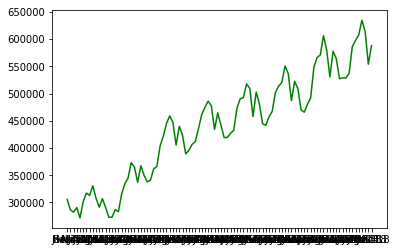

In [43]:
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["Los Angeles"], color = 'g')
plt.show()

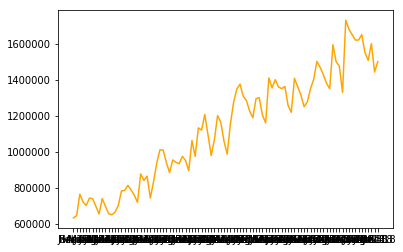

In [44]:
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["San Francisco"], color='orange')
plt.show()

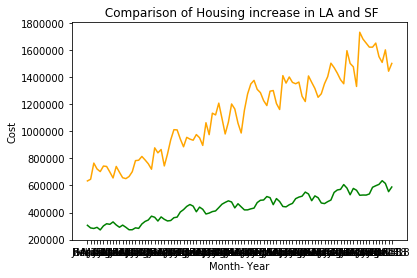

In [45]:
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["Los Angeles"], color = 'g')
plt.plot(medianHousing_df["Mon-Yr"], medianHousing_df["San Francisco"], color='orange')
plt.xlabel('Month- Year')
plt.ylabel('Cost')
plt.title (' Comparison of Housing increase in LA and SF')
plt.show()

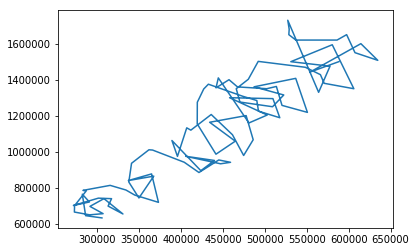

In [46]:
plt.plot(medianHousing_df["Los Angeles"], medianHousing_df["San Francisco"])
plt.show()